<a href="https://colab.research.google.com/github/julio7173/Proyectos-Personales/blob/main/AluraLatam_Aula_1_Inmersion_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [2]:
import pandas as pd
inmuebles = pd.read_csv("/content/drive/MyDrive/inmuebles_bogota.csv")

Promedio de área de todos los inmuebles en los barrios en el dataset, junto a una grafica de barras del top 10.

In [4]:
columnas = {"Baños" : "Banos", "Área" : "Area"}
inmuebles = inmuebles.rename(columns = columnas)

In [7]:
inmuebles.Area.mean()

146.66470588235293

47    260
60    174
48    172
54    168
70    151
50    143
51    142
59    133
53    133
63    132
Name: Area, dtype: int64

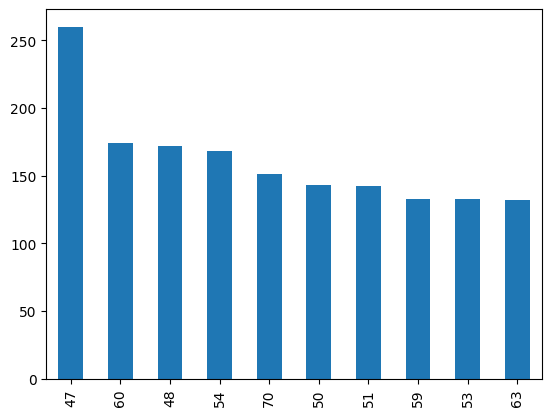

In [13]:
inmuebles.Area.value_counts().head(10).plot.bar()
inmuebles.Area.value_counts().head(10)

Consultar otros datos estadisticos, como; conteo, mediana, valores minimos y valores maximos.

En estadística, el **CONTEO** se refiere al número total de elementos en un conjunto de datos. La **MEDIANA** es el valor que se encuentra en el medio de un conjunto de datos ordenados. Es decir, la mitad de los valores es menor que o igual a la mediana y la otra mitad de los valores es mayor que o igual a la mediana1. Los valores **MINIMOS** y **MAXIMOS** son, respectivamente, el valor más pequeño y el valor más grande en un conjunto de datos.